In [1]:
import sys

# import tensorflow.keras
from tensorflow import keras

import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
# print(f"Tensor Flow Version: {keras}")
# print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")



Python Platform: macOS-13.4.1-arm64-arm-64bit

Python 3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.2
SciPy 1.10.1
GPU is available


In [1]:

import time
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

timeStart = time.time()

tokenizer = AutoTokenizer.from_pretrained(
    "meta-llama/Llama-2-7b-chat-hf"
)

model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Llama-2-7b-chat-hf",
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
)

print("Load model time: ", -timeStart + time.time())

while(True):
    input_str = input('Enter: ')
    input_token_length = input('Enter length: ')

    if(input_str == 'exit'):
        break

    timeStart = time.time()

    inputs = tokenizer.encode(
        input_str,
        return_tensors="pt"
    )

    outputs = model.generate(
        inputs,
        max_new_tokens=int(input_token_length),
    )

    output_str = tokenizer.decode(outputs[0])

    print(output_str)

    print("Time taken: ", -timeStart + time.time())



OSError: meta-llama/Llama-2-7b-chat-hf is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.

OSError: meta-llama/Llama-2-13b-chat-hf is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.

In [3]:

import tensorflow as tf
tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:


import numpy as np
import tensorflow as tf


x = np.random.random((10000, 5))
y = np.random.random((10000, 2))

x2 = np.random.random((2000, 5))
y2 = np.random.random((2000, 2))

inp = tf.keras.layers.Input(shape = (5,))
l1 = tf.keras.layers.Dense(256, activation = 'sigmoid')(inp)
l1 = tf.keras.layers.Dense(256, activation = 'sigmoid')(l1)
l1 = tf.keras.layers.Dense(256, activation = 'sigmoid')(l1)
l1 = tf.keras.layers.Dense(256, activation = 'sigmoid')(l1)
l1 = tf.keras.layers.Dense(256, activation = 'sigmoid')(l1)
o = tf.keras.layers.Dense(2, activation = 'sigmoid')(l1)

model = tf.keras.models.Model(inputs = [inp], outputs = [o])
model.compile(optimizer = "Adam", loss = "mse")

# model.fit(x, y, validation_data = (x2, y2), batch_size = 500, epochs = 500)



In [8]:

with tf.device('/GPU:0'):
    model.fit(x, y, validation_data = (x2, y2), batch_size = 500, epochs = 20000) 

Epoch 1/20000
20/20 [==============================] - 0s 8ms/step - loss: 0.0839 - val_loss: 0.0836
Epoch 2/20000
20/20 [==============================] - 0s 8ms/step - loss: 0.0838 - val_loss: 0.0834
Epoch 3/20000
20/20 [==============================] - 0s 7ms/step - loss: 0.0838 - val_loss: 0.0837
Epoch 4/20000
20/20 [==============================] - 0s 7ms/step - loss: 0.0838 - val_loss: 0.0834
Epoch 5/20000
20/20 [==============================] - 0s 11ms/step - loss: 0.0838 - val_loss: 0.0836
Epoch 6/20000
20/20 [==============================] - 0s 7ms/step - loss: 0.0839 - val_loss: 0.0835
Epoch 7/20000
20/20 [==============================] - 0s 7ms/step - loss: 0.0838 - val_loss: 0.0836
Epoch 8/20000
20/20 [==============================] - 0s 7ms/step - loss: 0.0838 - val_loss: 0.0835
Epoch 9/20000
20/20 [==============================] - 0s 7ms/step - loss: 0.0839 - val_loss: 0.0836
Epoch 10/20000
20/20 [==============================] - 0s 8ms/step - loss: 0.0839 - val_l

KeyboardInterrupt: 

In [ ]:


data = pd.read_csv("data/text_emotion.csv")
data


In [9]:

import os

os.environ["KERAS_BACKEND"] = "jax"  # or "tensorflow" or "torch"

import keras_nlp
import tensorflow as tf
import keras_core as keras
import time


Using JAX backend.


In [10]:
# To speed up training and generation, we use preprocessor of length 128
# instead of full length 1024.
preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)
gpt2_lm = keras_nlp.models.GPT2CausalLM.from_preset(
    "gpt2_base_en", preprocessor=preprocessor
)



1042301/1042301 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
456318/456318 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step


TypeError: Error when deserializing class 'GPT2Tokenizer' using config={'vocabulary': '/Users/ahmed/.keras/models/gpt2_base_en/vocab.json', 'merges': '/Users/ahmed/.keras/models/gpt2_base_en/merges.txt'}.

Exception encountered: GPT2Tokenizer requires the `tensorflow-text` package. Please install with `pip install tensorflow-text`.

In [13]:
tf.__version__

'2.13.0'

In [18]:
import pandas as pd 
data = pd.read_csv("toxic_comments_data/train.csv")


In [19]:


data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


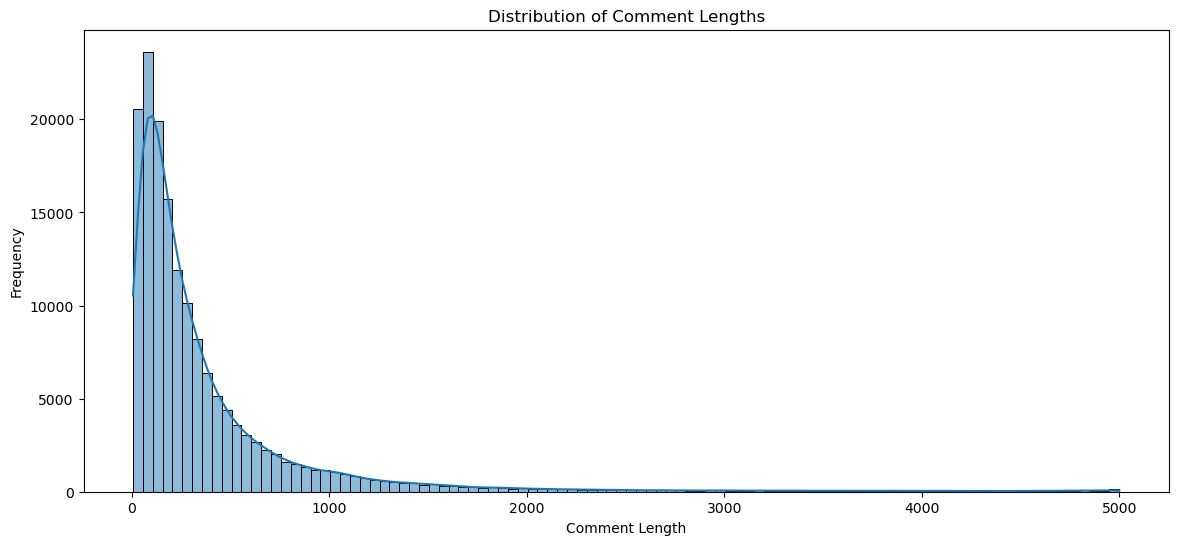

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate comment lengths
data['comment_length'] = data['comment_text'].apply(len)

# Plotting the distribution of comment lengths
plt.figure(figsize=(14, 6))
sns.histplot(data['comment_length'], bins=100, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


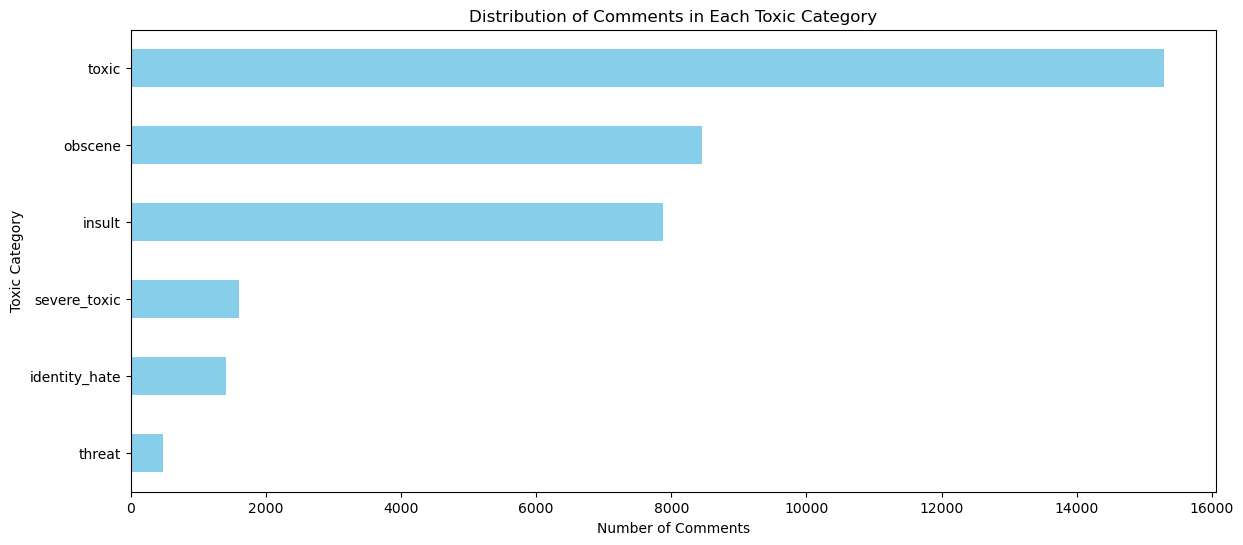

In [21]:


# Counting the number of comments in each toxic category
category_counts = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plotting the distribution of toxic categories
plt.figure(figsize=(14, 6))
category_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Comments in Each Toxic Category')
plt.xlabel('Number of Comments')
plt.ylabel('Toxic Category')
plt.show()

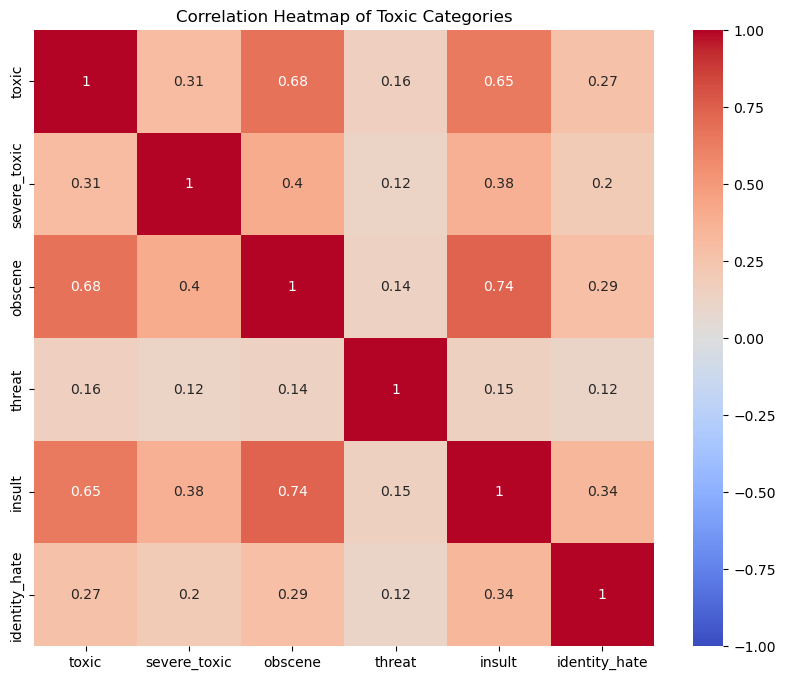

In [22]:

# Calculating correlation between toxic categories
correlation_matrix = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Toxic Categories')
plt.show()


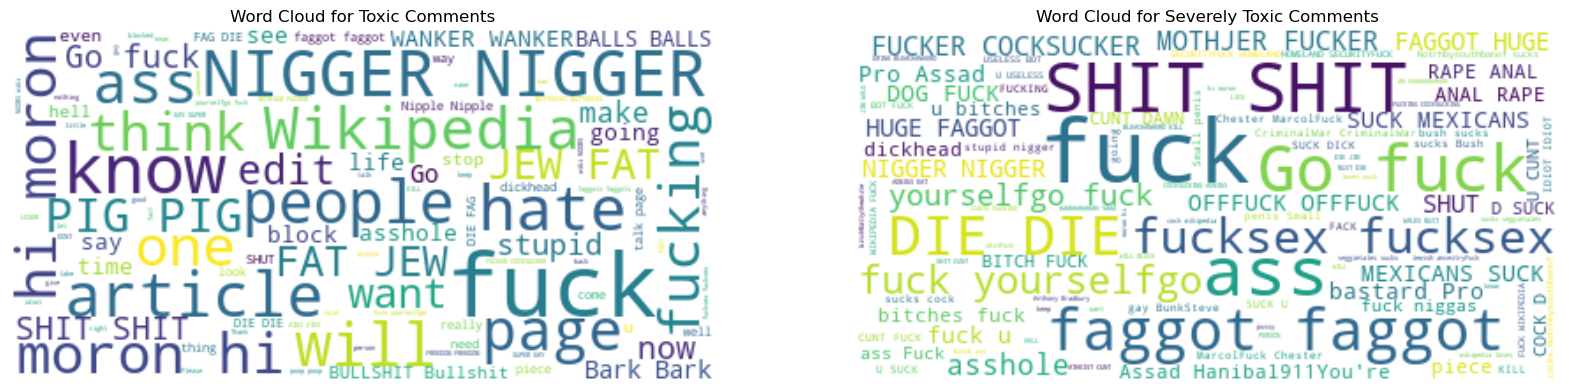

In [23]:

from wordcloud import WordCloud

# Function to generate word cloud for a specific category
def generate_wordcloud(category):
    text = ' '.join(data[data[category] == 1]['comment_text'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    return wordcloud

# Generating word clouds for toxic and severe_toxic categories
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(generate_wordcloud('toxic'), interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')

plt.subplot(1, 2, 2)
plt.imshow(generate_wordcloud('severe_toxic'), interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Severely Toxic Comments')

plt.show()



In [24]:
# Extracting a few sample comments from each category
sample_comments = {}
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for category in categories:
    sample_comments[category] = data[data[category] == 1]['comment_text'].sample(2).values

sample_comments_df = pd.DataFrame(sample_comments)
sample_comments_df




,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,cellpahi moron hi moron hi moron hi moron hi m...,You're a fucking idiot\n\n149.254.51.110,"""\n\nJust one final word for you assholes.... ...",faggot \n\nYou lil piece of shit I haven’t van...,Suck it James! \n\nhttp://manson-haters.blogs...,"Message \n\nGo fuck Loy Wong, you dirty, ol..."
1,WTF \n\nWhy you deleting my posts asshole!! \n...,NOT SET IN NEW YORK !!!! \nwhy when i deleted ...,gonna get you... \n\n...you giant twat faced p...,hello. i know where you live. i know what you ...,how is pointing out that you are ignorant a pe...,fuck you. Are you happy that Jews like Madoff ...


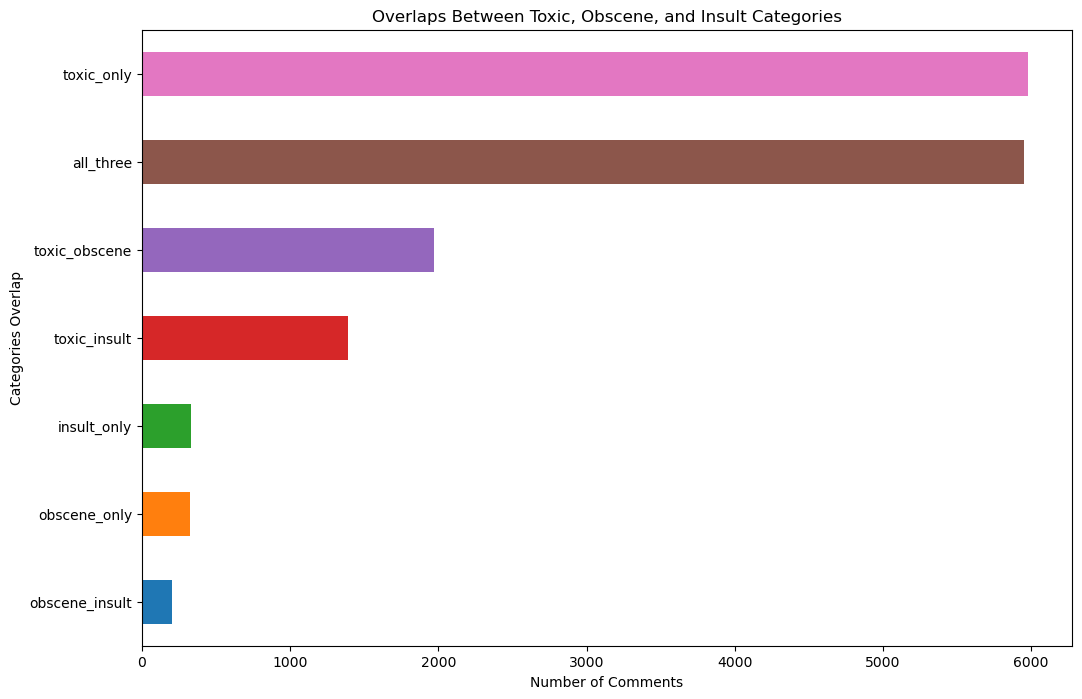

In [28]:
# Calculating overlaps for the three major categories
data['toxic_only'] = data.apply(lambda x: 1 if x['toxic'] == 1 and x['obscene'] == 0 and x['insult'] == 0 else 0, axis=1)
data['obscene_only'] = data.apply(lambda x: 1 if x['toxic'] == 0 and x['obscene'] == 1 and x['insult'] == 0 else 0, axis=1)
data['insult_only'] = data.apply(lambda x: 1 if x['toxic'] == 0 and x['obscene'] == 0 and x['insult'] == 1 else 0, axis=1)
data['toxic_obscene'] = data.apply(lambda x: 1 if x['toxic'] == 1 and x['obscene'] == 1 and x['insult'] == 0 else 0, axis=1)
data['toxic_insult'] = data.apply(lambda x: 1 if x['toxic'] == 1 and x['obscene'] == 0 and x['insult'] == 1 else 0, axis=1)
data['obscene_insult'] = data.apply(lambda x: 1 if x['toxic'] == 0 and x['obscene'] == 1 and x['insult'] == 1 else 0, axis=1)
data['all_three'] = data.apply(lambda x: 1 if x['toxic'] == 1 and x['obscene'] == 1 and x['insult'] == 1 else 0, axis=1)

overlap_counts = data[['toxic_only', 'obscene_only', 'insult_only', 'toxic_obscene', 'toxic_insult', 'obscene_insult', 'all_three']].sum()

# Plotting the overlaps using a stacked bar chart
overlap_counts.sort_values().plot(kind='barh', stacked=True, figsize=(12, 8), color=sns.color_palette("tab10", len(overlap_counts)))
plt.title('Overlaps Between Toxic, Obscene, and Insult Categories')
plt.xlabel('Number of Comments')
plt.ylabel('Categories Overlap')
plt.show()


In [29]:


from upsetplot import plot
from matplotlib_venn import venn2, venn3
from itertools import combinations

# Subset of data with any of the categories marked as 1
subset = data[data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0]

# Preparing data for upset plot
occurrences = {}

for count in range(1, 7):
    for comb in combinations(categories, count):
        mask = subset[list(comb)].sum(axis=1) == count
        occurrences[comb] = subset[mask].shape[0]

# Since a complete upset plot for 6 categories can be quite large, 
# we'll limit to combinations that have more than a certain threshold of occurrences
filtered_occurrences = {k: v for k, v in occurrences.items() if v > 50}

# Plotting the upset plot
plot(filtered_occurrences, orientation='horizontal')
plt.show()


AttributeError: 'dict' object has no attribute 'ndim'